<a href="https://colab.research.google.com/github/FathimaNazarudeen/lung-cancer/blob/main/Recursive%20Feature%20Elimination%20(RFE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data=pd.read_csv("/content/thirddatasetdata3lung1editednew.csv")

In [3]:
data['Label'].value_counts()

'squamous cell carcinoma'    83
'large cell'                 71
others                       70
adenocarcinoma               23
Name: Label, dtype: int64

In [4]:
data.columns 

Index(['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength',
       ...
       'wavelet-LLL_gldm_LowGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_ngtdm_Busyness', 'wavelet-LLL_ngtdm_Coarseness',
       'wavelet-LLL_ngtdm_Complexity', 'wavelet-LLL_ngtdm_Contrast',
       'wavelet-LLL_ngtdm_Strength', 'Label'],
      dtype='object', length=1094)

In [5]:
data_real = data.replace(np.inf, np.nan)

In [6]:
data_real.isnull().sum().sum()

0

In [7]:
data_df = data_real.dropna(axis=0)

In [8]:
data_df.isnull().sum().sum()

0

In [9]:
data_df

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength,Label
0,0.898535,0.570600,31.886509,55.882450,63.529521,66.573268,61.188234,72.718636,48863.000000,50.212354,...,0.000175,0.782714,188544.34720,0.000174,0.001121,0.001950,5.241414e+06,1.329551,576.487136,'large cell'
1,0.356341,0.293696,30.746972,104.689637,62.289646,76.837491,48.332184,99.015150,16849.666670,37.305177,...,0.000480,0.809799,185506.13380,0.000478,0.000573,0.006157,3.263341e+06,8.577655,1468.964920,'large cell'
2,0.972992,0.838632,36.685554,43.744513,56.920998,59.093147,50.000000,59.531504,45073.000000,42.563080,...,0.000204,0.607683,51789.09974,0.000200,0.003829,0.001594,1.033373e+06,1.189275,158.997655,'large cell'
3,0.355514,0.250921,32.048424,127.723174,92.130342,52.153619,50.159745,158.808060,13973.333330,45.407417,...,0.000609,0.672628,16150.60173,0.000595,0.008233,0.005954,6.759171e+04,0.596882,48.462226,'large cell'
4,0.869980,0.715864,37.872296,52.904327,63.780875,65.115282,59.363288,70.992957,50277.333330,46.025717,...,0.000179,0.739990,152246.78220,0.000178,0.001932,0.001420,3.371136e+06,2.314521,364.513624,'large cell'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.613950,0.536166,67.085543,125.120921,151.433154,143.178211,118.962179,186.986630,262922.000000,76.818007,...,0.000055,0.539262,30796.75751,0.000047,0.018433,0.000387,5.073418e+05,0.115637,33.076902,others
243,0.706267,0.473298,19.144342,40.448808,39.395431,48.414874,34.234486,49.071377,13417.666670,28.567655,...,0.000797,0.635981,11131.16552,0.000775,0.007429,0.006453,8.507560e+04,0.600453,51.726423,others
244,0.832425,0.624674,10.141866,16.235443,19.697716,17.204651,16.124516,19.798990,1428.000000,13.514788,...,0.005545,0.855006,21236.68132,0.005537,0.003682,0.030105,8.491850e+04,4.490970,194.650316,others
245,0.505327,0.335579,14.737564,43.916805,45.650849,41.761226,29.120440,50.358713,7421.333333,22.192352,...,0.001130,0.715150,10757.09395,0.001110,0.007144,0.010583,5.701539e+04,0.849220,56.233061,others


In [10]:
data_X = data_df.drop(['Label'], axis = 1)

In [11]:
data_X.columns 

Index(['original_shape_Elongation', 'original_shape_Flatness',
       'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength',
       'original_shape_Maximum2DDiameterColumn',
       'original_shape_Maximum2DDiameterRow',
       'original_shape_Maximum2DDiameterSlice',
       'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
       'original_shape_MinorAxisLength',
       ...
       'wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_gldm_LowGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceEmphasis',
       'wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis',
       'wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis',
       'wavelet-LLL_ngtdm_Busyness', 'wavelet-LLL_ngtdm_Coarseness',
       'wavelet-LLL_ngtdm_Complexity', 'wavelet-LLL_ngtdm_Contrast',
       'wavelet-LLL_ngtdm_Strength'],
      dtype='object', length=1093)

In [12]:
data_X.shape 

(247, 1093)

In [13]:
data_y = data_df['Label']

In [14]:
data_y.shape 

(247,)

In [15]:
data_df.isnull().sum().sum()

0

In [16]:
data_y.unique()

array(["'large cell'", "'squamous cell carcinoma'", 'adenocarcinoma',
       'others'], dtype=object)

In [17]:
data_X 

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,0.898535,0.570600,31.886509,55.882450,63.529521,66.573268,61.188234,72.718636,48863.000000,50.212354,...,0.000182,0.000175,0.782714,188544.34720,0.000174,0.001121,0.001950,5.241414e+06,1.329551,576.487136
1,0.356341,0.293696,30.746972,104.689637,62.289646,76.837491,48.332184,99.015150,16849.666670,37.305177,...,0.000492,0.000480,0.809799,185506.13380,0.000478,0.000573,0.006157,3.263341e+06,8.577655,1468.964920
2,0.972992,0.838632,36.685554,43.744513,56.920998,59.093147,50.000000,59.531504,45073.000000,42.563080,...,0.000242,0.000204,0.607683,51789.09974,0.000200,0.003829,0.001594,1.033373e+06,1.189275,158.997655
3,0.355514,0.250921,32.048424,127.723174,92.130342,52.153619,50.159745,158.808060,13973.333330,45.407417,...,0.000702,0.000609,0.672628,16150.60173,0.000595,0.008233,0.005954,6.759171e+04,0.596882,48.462226
4,0.869980,0.715864,37.872296,52.904327,63.780875,65.115282,59.363288,70.992957,50277.333330,46.025717,...,0.000188,0.000179,0.739990,152246.78220,0.000178,0.001932,0.001420,3.371136e+06,2.314521,364.513624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.613950,0.536166,67.085543,125.120921,151.433154,143.178211,118.962179,186.986630,262922.000000,76.818007,...,0.000135,0.000055,0.539262,30796.75751,0.000047,0.018433,0.000387,5.073418e+05,0.115637,33.076902
243,0.706267,0.473298,19.144342,40.448808,39.395431,48.414874,34.234486,49.071377,13417.666670,28.567655,...,0.000960,0.000797,0.635981,11131.16552,0.000775,0.007429,0.006453,8.507560e+04,0.600453,51.726423
244,0.832425,0.624674,10.141866,16.235443,19.697716,17.204651,16.124516,19.798990,1428.000000,13.514788,...,0.005574,0.005545,0.855006,21236.68132,0.005537,0.003682,0.030105,8.491850e+04,4.490970,194.650316
245,0.505327,0.335579,14.737564,43.916805,45.650849,41.761226,29.120440,50.358713,7421.333333,22.192352,...,0.001249,0.001130,0.715150,10757.09395,0.001110,0.007144,0.010583,5.701539e+04,0.849220,56.233061


Label encoding

In [18]:
from sklearn.preprocessing import LabelEncoder 

In [19]:
le = LabelEncoder()

In [20]:
data_y_trans = le.fit_transform(data_y)


In [21]:
data_X

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MeshVolume,original_shape_MinorAxisLength,...,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,wavelet-LLL_ngtdm_Busyness,wavelet-LLL_ngtdm_Coarseness,wavelet-LLL_ngtdm_Complexity,wavelet-LLL_ngtdm_Contrast,wavelet-LLL_ngtdm_Strength
0,0.898535,0.570600,31.886509,55.882450,63.529521,66.573268,61.188234,72.718636,48863.000000,50.212354,...,0.000182,0.000175,0.782714,188544.34720,0.000174,0.001121,0.001950,5.241414e+06,1.329551,576.487136
1,0.356341,0.293696,30.746972,104.689637,62.289646,76.837491,48.332184,99.015150,16849.666670,37.305177,...,0.000492,0.000480,0.809799,185506.13380,0.000478,0.000573,0.006157,3.263341e+06,8.577655,1468.964920
2,0.972992,0.838632,36.685554,43.744513,56.920998,59.093147,50.000000,59.531504,45073.000000,42.563080,...,0.000242,0.000204,0.607683,51789.09974,0.000200,0.003829,0.001594,1.033373e+06,1.189275,158.997655
3,0.355514,0.250921,32.048424,127.723174,92.130342,52.153619,50.159745,158.808060,13973.333330,45.407417,...,0.000702,0.000609,0.672628,16150.60173,0.000595,0.008233,0.005954,6.759171e+04,0.596882,48.462226
4,0.869980,0.715864,37.872296,52.904327,63.780875,65.115282,59.363288,70.992957,50277.333330,46.025717,...,0.000188,0.000179,0.739990,152246.78220,0.000178,0.001932,0.001420,3.371136e+06,2.314521,364.513624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,0.613950,0.536166,67.085543,125.120921,151.433154,143.178211,118.962179,186.986630,262922.000000,76.818007,...,0.000135,0.000055,0.539262,30796.75751,0.000047,0.018433,0.000387,5.073418e+05,0.115637,33.076902
243,0.706267,0.473298,19.144342,40.448808,39.395431,48.414874,34.234486,49.071377,13417.666670,28.567655,...,0.000960,0.000797,0.635981,11131.16552,0.000775,0.007429,0.006453,8.507560e+04,0.600453,51.726423
244,0.832425,0.624674,10.141866,16.235443,19.697716,17.204651,16.124516,19.798990,1428.000000,13.514788,...,0.005574,0.005545,0.855006,21236.68132,0.005537,0.003682,0.030105,8.491850e+04,4.490970,194.650316
245,0.505327,0.335579,14.737564,43.916805,45.650849,41.761226,29.120440,50.358713,7421.333333,22.192352,...,0.001249,0.001130,0.715150,10757.09395,0.001110,0.007144,0.010583,5.701539e+04,0.849220,56.233061


In [22]:
df2 = pd.DataFrame(data_X)  

In [23]:
df2.to_csv(r'my_data.csv', index=False)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(data_X, data_y_trans, train_size = 0.7)

In [25]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

FEATURE SELECTION

Recursive Feature Elimination (RFE)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

lin_reg=LinearRegression()

rfe_mod=RFE(lin_reg)
myvalues=rfe_mod.fit(data_X, data_y_trans)
myvalues.support_
myvalues.ranking_


print("Num of features: %s"%(myvalues.n_features_))
print("Selected features:%s"%(myvalues.support_))
print("Feature Ranking :%s"%(myvalues.ranking_))

Num of features: 546
Selected features:[ True False  True ... False  True  True]
Feature Ranking :[  1 353   1 ... 192   1   1]


In [50]:
myvalues.n_features_

546

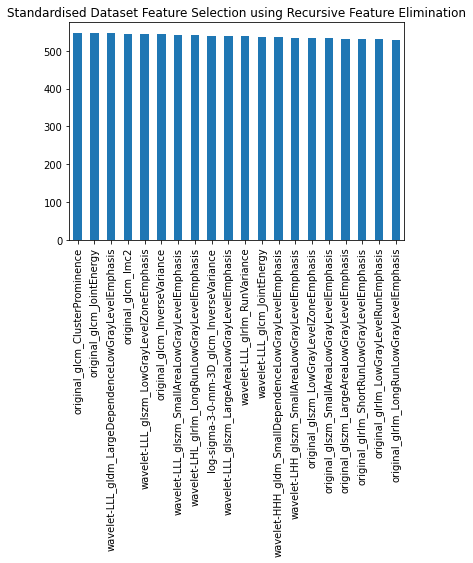

In [58]:
feature_importance_std = pd.Series(myvalues.ranking_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using Recursive Feature Elimination')

In [59]:
feature_importance_std.nlargest(20)

original_glcm_ClusterProminence                         548
original_glcm_JointEnergy                               547
wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis    546
original_glcm_Imc2                                      545
wavelet-LLL_glszm_LowGrayLevelZoneEmphasis              544
original_glcm_InverseVariance                           543
wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis         542
wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis           541
log-sigma-3-0-mm-3D_glcm_InverseVariance                540
wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis         539
wavelet-LLL_glrlm_RunVariance                           538
wavelet-LLL_glcm_JointEnergy                            537
wavelet-HHH_gldm_SmallDependenceLowGrayLevelEmphasis    536
wavelet-LHH_glszm_SmallAreaLowGrayLevelEmphasis         535
original_glszm_LowGrayLevelZoneEmphasis                 534
original_glszm_SmallAreaLowGrayLevelEmphasis            533
original_glszm_LargeAreaLowGrayLevelEmph

In [60]:
data_new_20features_X = data_X[['original_glcm_ClusterProminence',
'original_glcm_JointEnergy',
'wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis',
'original_glcm_Imc2',
'wavelet-LLL_glszm_LowGrayLevelZoneEmphasis',
'original_glcm_InverseVariance',
'wavelet-LLL_glszm_SmallAreaLowGrayLevelEmphasis',
'wavelet-LHL_glrlm_LongRunLowGrayLevelEmphasis',
'log-sigma-3-0-mm-3D_glcm_InverseVariance',
'wavelet-LLL_glszm_LargeAreaLowGrayLevelEmphasis',
'wavelet-LLL_glrlm_RunVariance',
'wavelet-LLL_glcm_JointEnergy',
'wavelet-HHH_gldm_SmallDependenceLowGrayLevelEmphasis',
'wavelet-LHH_glszm_SmallAreaLowGrayLevelEmphasis',
'original_glszm_LowGrayLevelZoneEmphasis',
'original_glszm_SmallAreaLowGrayLevelEmphasis',
'original_glszm_LargeAreaLowGrayLevelEmphasis',
'original_glrlm_ShortRunLowGrayLevelEmphasis',
'original_glrlm_LowGrayLevelRunEmphasis',
'original_glrlm_LongRunLowGrayLevelEmphasis']]

In [61]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_new_20features_X, data_y_trans, train_size = 0.8, random_state=26)

In [62]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

Random forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=56)
rf.fit(X_train_std_20, y_train_20)

RandomForestClassifier(random_state=56)

In [64]:
rf_y_pred = rf.predict(X_test_std_20)

In [65]:
from sklearn.metrics import accuracy_score 

In [66]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 44.0


In [67]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix

In [68]:
print("Classification Report for Random Forest: \n", classification_report(y_test_20,rf_y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.35      0.46      0.40        13
           1       0.47      0.47      0.47        19
           2       0.00      0.00      0.00         4
           3       0.50      0.50      0.50        14

    accuracy                           0.44        50
   macro avg       0.33      0.36      0.34        50
weighted avg       0.41      0.44      0.42        50



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[6 4 0 3]
 [7 9 0 3]
 [1 2 0 1]
 [3 4 0 7]]


CROSS VALIDATION

In [70]:
from sklearn.model_selection import KFold

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
from sklearn.model_selection import cross_validate

In [73]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(rf,data_new_20features_X, data_y_trans,cv=kfold_validation)
print(results)
print(np.mean(results))
     

[0.84       0.76       0.8        0.8        0.96       0.88
 0.4        0.79166667 0.75       0.83333333]
0.7815


In [85]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(rf, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [86]:
print(conf_mat)

[[62  5  0  4]
 [ 2 76  0  5]
 [ 1  0 20  2]
 [ 3  2  0 65]]


In [87]:
print("Classification Report for Random Forest: \n", classification_report(data_y_trans,y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        71
           1       0.92      0.92      0.92        83
           2       1.00      0.87      0.93        23
           3       0.86      0.93      0.89        70

    accuracy                           0.90       247
   macro avg       0.92      0.90      0.91       247
weighted avg       0.91      0.90      0.90       247



In [88]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [89]:
from sklearn.preprocessing import label_binarize
y_bin = label_binarize(data_y_trans, classes=[0, 1, 2,3])
from itertools import cycle
lw=2

In [90]:
import matplotlib.pyplot as plt

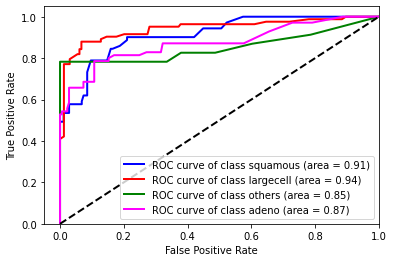

In [91]:
y_score = cross_val_predict(rf, data_new_20features_X, data_y_trans, cv=2 ,method='predict_proba')

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green','magenta'])
list_class = ['squamous','largecell','others','adeno']
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(list_class[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

svm

In [137]:
from sklearn.svm import SVC

svm_rbf = SVC(gamma=4, C=1)

In [138]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(svm_rbf, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [139]:
print("Classification Report for Random Forest: \n", classification_report(data_y_trans,y_pred))

Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        71
           1       0.76      0.90      0.82        83
           2       1.00      0.87      0.93        23
           3       1.00      0.84      0.91        70

    accuracy                           0.85       247
   macro avg       0.90      0.85      0.87       247
weighted avg       0.87      0.85      0.86       247



knn

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(3) 

In [132]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(knn, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [133]:
print("Classification Report for knn: \n", classification_report(data_y_trans,y_pred))

Classification Report for knn: 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76        71
           1       0.68      0.72      0.70        83
           2       0.63      0.52      0.57        23
           3       0.65      0.66      0.65        70

    accuracy                           0.69       247
   macro avg       0.68      0.66      0.67       247
weighted avg       0.69      0.69      0.69       247



ROC Curve

In [134]:
def RoC_Curve(classifier, X_val, y_val, title): 
        """ RoC Curve for Classifier 
        Parameters: 
        ------------
        classifier: Machine Learning Classifier to be Evaluated
        X_val: Validation Dataset
        y_val: Label/Target of Validation Dataset

        Attributes:
        Plots the Graph    
        
        Note: Some part of this Method code is taken 
            from Sklearn Website
        """

        lw = 2
        n_classes = 3
        y_test1 = to_categorical(y_val)
        pred_RFC_proba = classifier.predict_proba(X_val)
        y_score = pred_RFC_proba

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(20,10))
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        list_class = ['adeno','squamous','other']
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(list_class[i], roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(title) 
        plt.legend(loc="lower right")
        plt.show()

In [135]:
from keras.utils.np_utils import to_categorical
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

<ipython-input-134-3fa2d96845d8>:40: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


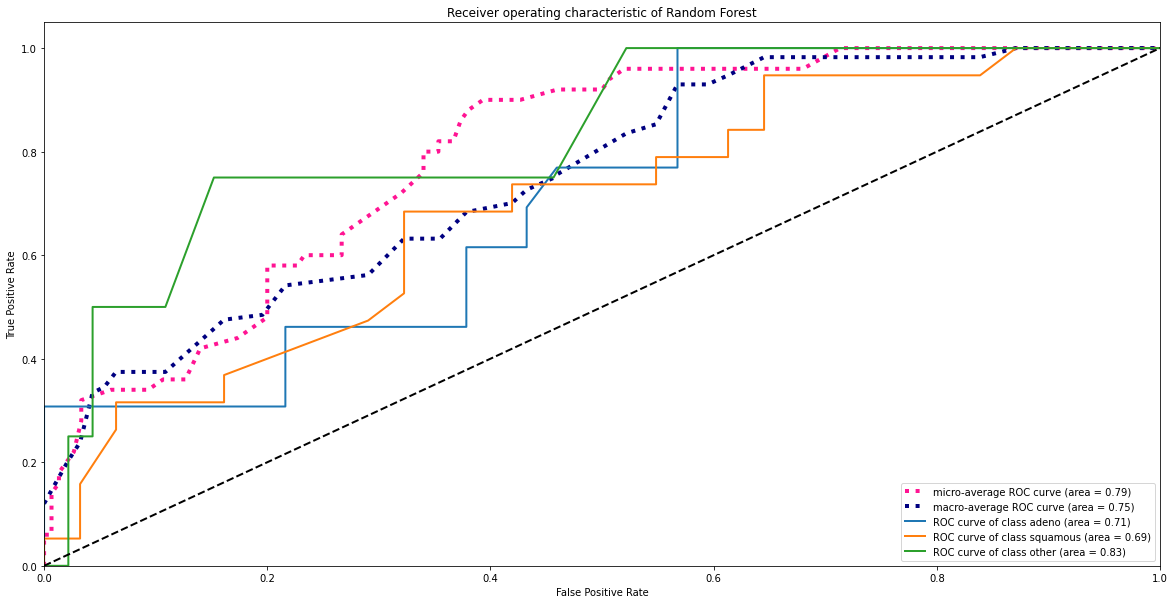

In [136]:
title = 'Receiver operating characteristic of Random Forest'
RoC_Curve(rf, X_test_std_20, y_test_20, title)

XGBoost

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

In [103]:
gradient_boost = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1,
max_depth=3, random_state=0)

In [130]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(gradient_boost, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [131]:
print("Classification Report for xgboost: \n", classification_report(data_y_trans,y_pred))

Classification Report for xgboost: 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91        71
           1       0.90      0.90      0.90        83
           2       0.91      0.87      0.89        23
           3       0.83      0.91      0.87        70

    accuracy                           0.89       247
   macro avg       0.90      0.89      0.89       247
weighted avg       0.90      0.89      0.90       247



DECISION TREE

In [125]:
from sklearn.tree import DecisionTreeClassifier 
dt = DecisionTreeClassifier(random_state=56)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred1 = cross_val_predict(dt, data_new_20features_X, data_y_trans, cv=10)
conf_mat = confusion_matrix(data_y_trans, y_pred)

In [128]:
print("Classification Report for xgboost: \n", classification_report(data_y_trans,y_pred1))

Classification Report for xgboost: 
               precision    recall  f1-score   support

           0       0.90      0.80      0.85        71
           1       0.89      0.88      0.88        83
           2       0.74      0.87      0.80        23
           3       0.88      0.94      0.91        70

    accuracy                           0.87       247
   macro avg       0.85      0.87      0.86       247
weighted avg       0.88      0.87      0.87       247

